Visualising a pinhole camera

In [2]:
import numpy as np
H = 400
W = 400
f = 1200

In [3]:
rays_o =  np.zeros((H*W,3)) #Because we are in 3D
rays_d = np.zeros((H*W,3))

u = np.arange(W)
v = np.arange(H)

In [6]:
u,v

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [7]:
u,v = np.meshgrid(u,v)

In [16]:
u.shape

(400, 400)

In [17]:
v.shape

(400, 400)

In [12]:
dirs = np.stack((u - W/2, - (v - H/2), - np.ones_like(u) * f), axis=-1)

In [29]:
dirs[200,399]

array([  199.,    -0., -1200.])

In [14]:
rays_d = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)

In [15]:
rays_d

array([[[-0.16222142,  0.16222142, -0.97332853],
        [-0.1614315 ,  0.16224272, -0.9734563 ],
        [-0.16064128,  0.16226391, -0.97358349],
        ...,
        [ 0.15985074,  0.16228501, -0.97371008],
        [ 0.16064128,  0.16226391, -0.97358349],
        [ 0.1614315 ,  0.16224272, -0.9734563 ]],

       [[-0.16224272,  0.1614315 , -0.9734563 ],
        [-0.1614527 ,  0.1614527 , -0.97358413],
        [-0.16066237,  0.1614738 , -0.97371136],
        ...,
        [ 0.15987174,  0.1614948 , -0.973838  ],
        [ 0.16066237,  0.1614738 , -0.97371136],
        [ 0.1614527 ,  0.1614527 , -0.97358413]],

       [[-0.16226391,  0.16064128, -0.97358349],
        [-0.1614738 ,  0.16066237, -0.97371136],
        [-0.16068338,  0.16068338, -0.97383864],
        ...,
        [ 0.15989264,  0.16070428, -0.97396534],
        [ 0.16068338,  0.16068338, -0.97383864],
        [ 0.1614738 ,  0.16066237, -0.97371136]],

       ...,

       [[-0.16228501, -0.15985074, -0.97371008],
        [-0

In [33]:
rays_d = rays_d.reshape(-1,3)

In [34]:
rays_d.shape

(160000, 3)

In [54]:
import matplotlib.pyplot as plt

def project_rays(o,d,t):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection='3d')
    pt1 = o
    pt2 = o + t * d

    for p1,p2 in zip(pt1[::333],pt2[::333]):
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]])
    
    plt.show()
         
        

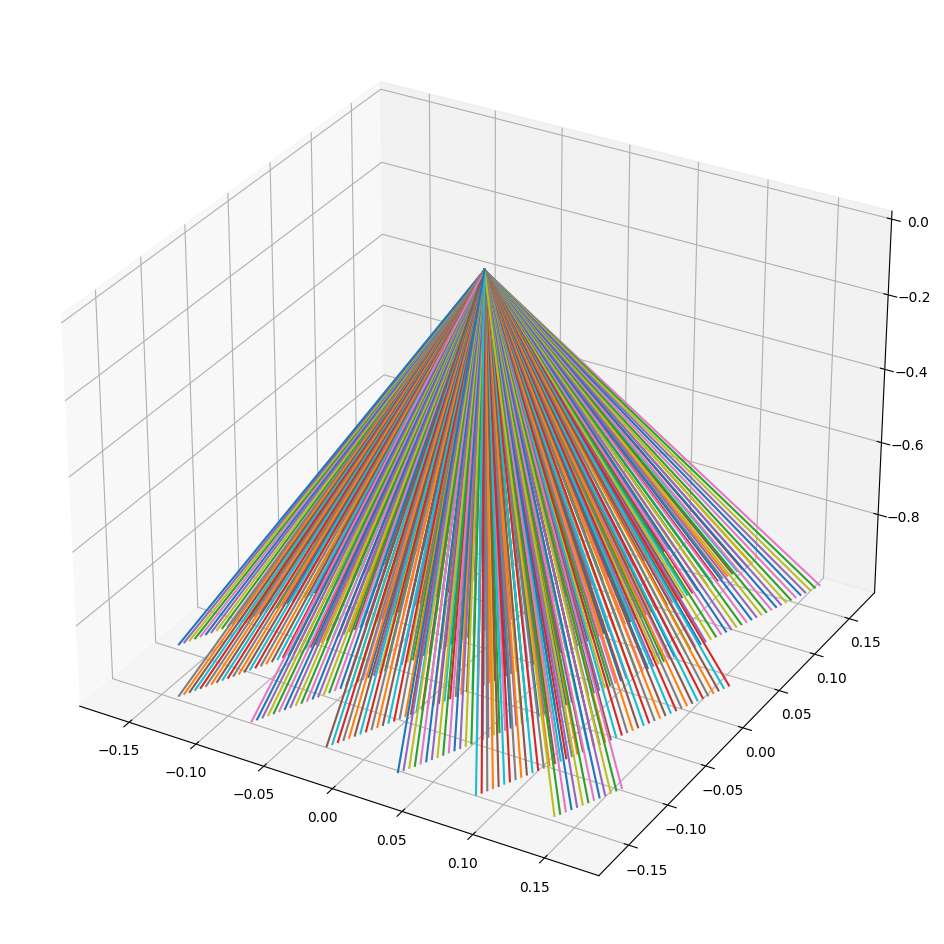

In [55]:
project_rays(rays_o,rays_d,1)

Scene Creation

<img src='Screenshot 2023-08-06 at 7.29.24 PM.png' size='100px'></img>

In [68]:
class Sphere():

    def __init__(self, p ,r ,c): # position , radius and color
        self.p = p
        self.r = r
        self.c = c

    def intersect(self, o ,d):

        # Equation of the sphere : (x-xc)^2 + (y-yc)^2 + (z-zc)^2 = r^2
        
        a = d[:,0]**2 + d[:,1]**2 + d[:,2]**2
        b = 2 * ((d[:,0]* (o[:,0]-self.p[0])) + (d[:,1]* (o[:,1]-self.p[1])) + (d[:,2]* (o[:,2]-self.p[2])))
        c = (o[:,0] - self.p[0])**2 + (o[:,1] - self.p[1])**2 + (o[:,2] - self.p[2])**2 - self.r** 2

        pho = b**2 - 4*a*c

        cond = pho >= 0
        num_rays = o.shape[0]
        colors = np.zeros((num_rays,3))

        colors[cond] = self.c
        print(cond.shape)
        return colors
        


In [69]:
s = Sphere(np.array([0.,0.,-1.]),.1,np.array([1.,1.,1.]))

In [70]:
c = s.intersect(rays_o,rays_d)

(160000,)


In [71]:
img = c.reshape(H,W,3)

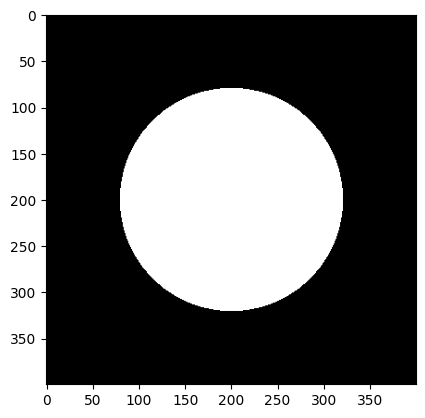

In [74]:
plt.imshow(img)

In [58]:
hello = 4
t = hello >=0
t

True

In [80]:
class intersecting_spheres():

    def __init__(self, p1 , r1 ,c1, p2, r2, c2):
        self.p1 = p1
        self.r1 = r1
        self.c1 = c1
        self.p2 = p2
        self.r2 = r2
        self.c2 = c2

    def intersect_two(self, o1, d1, o2, d2):
        
        a = d1[:,0]**2 + d1[:,1]**2 + d1[:,2]**2
        b = 2 * ((d1[:,0]* (o1[:,0]-self.p1[0])) + (d1[:,1]* (o1[:,1]-self.p1[1])) + (d1[:,2]* (o1[:,2]-self.p1[2])))
        c = (o1[:,0] - self.p1[0])**2 + (o1[:,1] - self.p1[1])**2 + (o1[:,2] - self.p1[2])**2 - self.r1** 2

        pho = b**2 - 4*a*c

        cond = pho >= 0
        num_rays = o1.shape[0]
        colors = np.zeros((num_rays,3))

        
        
        a1 = d2[:,0]**2 + d2[:,1]**2 + d2[:,2]**2
        b1 = 2 * ((d2[:,0]* (o2[:,0]-self.p2[0])) + (d2[:,1]* (o2[:,1]-self.p2[1])) + (d2[:,2]* (o2[:,2]-self.p2[2])))
        c1 = (o2[:,0] - self.p2[0])**2 + (o2[:,1] - self.p2[1])**2 + (o2[:,2] - self.p2[2])**2 - self.r2** 2

        pho = b1**2 - 4*a*c

        cond= pho>=0
        colors[cond] = self.c2
        colors[cond] = self.c1
        
        return colors

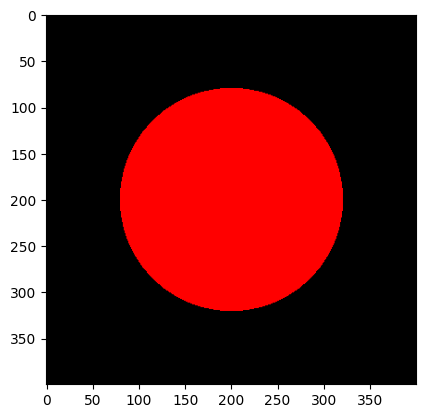

In [97]:
s = intersecting_spheres(np.array([0.,0.,-1.]),.1,np.array([1.,1.,1.]), np.array([0.,0.,-1.]),.0001,np.array([1.,0.,0.]))
c = s.intersect_two(rays_o,rays_d,rays_o,rays_d)
img = c.reshape(H,W,3)
plt.imshow(img)
